In [13]:
# Import required libraries

import numpy as np
import matplotlib.pyplot as plt

# scale the figures in this notebook
plt.rcParams['figure.figsize'] = 16, 5
np.random.seed(3)

In [14]:
# lets create data to draw the normal distribution curve
mu,sigma = 0,1
x = np.arange(-5,5,0.001)
y = (1/(sigma * np.sqrt(2 * np.pi)*sigma**2)) * np.exp( - (x - mu)**2 / (2 * sigma**2))

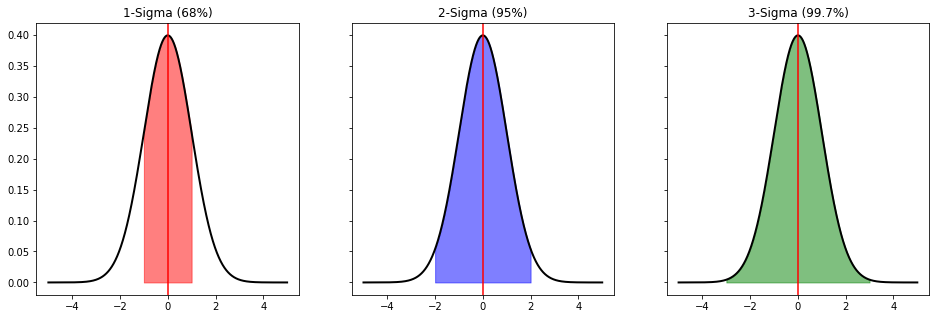

In [15]:
fig, subplots = plt.subplots(1, 3,sharey=True)


x_ind_sigma = ((x > (mu-sigma)) & (x < (mu+sigma)))
x_ind_2sigma = ((x > (mu-2*sigma)) & (x < (mu+2*sigma)))
x_ind_3sigma = ((x > (mu-3*sigma)) & (x < (mu+3*sigma)))

subplots[0].set_title('1-Sigma (68%)')
subplots[0].plot(x,y,linewidth=2,color='black')
subplots[0].fill_between(x[x_ind_sigma],0,y[x_ind_sigma],color='r',alpha=0.5)
subplots[0].axvline(mu,color='r')

subplots[1].set_title('2-Sigma (95%)')
subplots[1].plot(x,y,linewidth=2,color='black')
subplots[1].fill_between(x[x_ind_2sigma],0,y[x_ind_2sigma],color='b',alpha=0.5)
subplots[1].axvline(mu,color='r')

subplots[2].set_title('3-Sigma (99.7%)')
subplots[2].plot(x,y,linewidth=2,color='black')
subplots[2].fill_between(x[x_ind_3sigma],0,y[x_ind_3sigma],color='g',alpha=0.5)
subplots[2].axvline(mu,color='r')

plt.show()

In [16]:
# generate simulated data to test central limit theorem
mu,sigma = 5,10

# generate population of size 1 million
pop = np.random.normal(mu,sigma,1000000)
print('population size : ' + str(pop.size))
print('population mean : ' + str(np.mean(pop)))
print('population standard deviation : ' + str(np.std(pop)))

population size : 1000000
population mean : 5.01958404535
population standard deviation : 9.98282910532


In [17]:
# lets draw samples of sample size 700 for 1000 times
sample_size = 700
num_of_samples = 1000
samples = np.zeros((num_of_samples,sample_size))

sample_means = np.zeros(num_of_samples)
for s in range(num_of_samples):
    sample_means[s] = np.mean(np.random.choice(pop,sample_size))
    

In [18]:
# verify if population mean is approximately equal to mean of sample means
# verify if population std is approximately equal to std of sample means multiplied with square root of sample size
print('Population mean: {} , mean of sample means : {}'.format(np.mean(pop),np.mean(sample_means)))
print('std for population: {}, std of sample means: {}'.format(np.std(sample_means),np.std(pop)/sample_size**(1/2)))

Population mean: 5.0195840453498795 , mean of sample means : 5.029553488897466
std for population: 0.37048932112914357, std of sample means: 0.37731547419338984


In [19]:
# Lets test this various sample sizes

sample_size_array = [10,30,50,70,100,300,500,700,1000,3000,5000,7000,10000,30000,50000]

samp_mean_means = np.zeros(len(sample_size_array))
samp_mean_std = np.zeros(len(sample_size_array))


for i,val in enumerate(sample_size_array):
    sample_means = np.zeros(num_of_samples)
    for k in range(num_of_samples):
        sample_means[k] = np.mean(np.random.choice(pop,val))
    samp_mean_means[i] = np.mean(sample_means)
    samp_mean_std[i] = np.mean(np.std(sample_means)*(val**(1/2)))

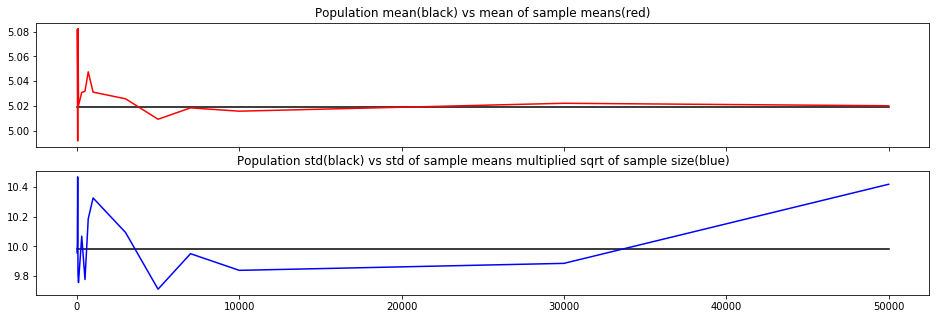

In [20]:
fig,subplot = plt.subplots(2,1,sharex=True)

subplot[0].set_title('Population mean(black) vs mean of sample means(red)')
subplot[0].plot(sample_size_array,np.full(len(sample_size_array),np.mean(pop)),color='black')
subplot[0].plot(sample_size_array,samp_mean_means,color='r')

subplot[1].set_title('Population std(black) vs std of sample means multiplied sqrt of sample size(blue)')
subplot[1].plot(sample_size_array,np.full(len(sample_size_array),np.std(pop)),color='black')
subplot[1].plot(sample_size_array,samp_mean_std,color='b')

plt.show()

## so we saw that mean of sample means is almost equal to population mean and std of population is almost equal to std of samples means multiplied with square root of sample size